In [1]:
# coding-utf-8
from deep_qnetwork import DeepQNetwork
import random
import copy

NUM_IN   = 2
NUM_HID1 = 100
NUM_HID2 = 100
NUM_HID3 = 100
NUM_OUT  = 3
BATCH_SIZE = 200
EPOCH = 500
GAMMA = 0.9
EPSIL = 0.1
NUM_LIMIT_RECORD = 1000
NUM_INIT_RECORD = 10000
ProccerUnit = "CPU"
MODEL_NAME = "./DQN_model/MC1.model"
ACTION = [0, 1, 2]
RESULT_REWARD = []

def agent_action(env, action):
    next_state, reward, terminal, info = env.step(action)
    return next_state, reward, terminal, info

def deep_Q_learn(env, Agent):
    STEP = 200
    Agent.load_weight()
    Agent.update_target_network()
    for episode in range(1, EPOCH+1):
        now_state = env.reset()
        sum_reward = 0
        for step in range(1, STEP+1):
            # 方策に従って行動を選択
            action, _, action_list = Agent.policy_egreedy(now_state, Agent.Q_network)
            # 行動による次状態を観測
            next_state, reward, term, _ = agent_action(env, ACTION[action])
            # ゴールの設定
            terminal, reward = (True, 1.0) if term else (False, reward)
    
            sum_reward += reward
            Agent.stock_record(now_state, action, next_state, reward, terminal, action_list)
                
            # 状態更新
            now_state = copy.deepcopy(next_state)
            # env.render()
            
            if terminal:
                break
            
            # Experience_Replayによるバッチ学習
            if len(Agent.record) > NUM_LIMIT_RECORD:
                Agent.init_record()
                if step % 20 == 0:
                    Agent.experience_replay()
                    Agent.EPSIL -= EPSIL / EPOCH / 6
                if step % 40 == 0:
                    Agent.update_target_network()               
                    Agent.save_weight()
                
        print(episode, sum_reward, Agent.EPSIL)
        RESULT_REWARD.append(sum_reward)
    gragh(RESULT_REWARD, len(RESULT_REWARD))
                
def run():
    import gym
    env = gym.make("MountainCar-v0")
    Agent = DeepQNetwork(NUM_IN, NUM_HID1, NUM_HID2, NUM_HID3, NUM_OUT,
                         ProccerUnit, EPSIL, GAMMA, BATCH_SIZE, MODEL_NAME)
    deep_Q_learn(env, Agent)

In [2]:
# coding:utf-8
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def gragh(result, epoch):    
    x = np.arange(0, epoch, 1)
    left = np.array(x)
    height = np.array(result)
    plt.plot(left, height)

[2017-06-04 01:05:58,753] Making new env: MountainCar-v0


1 -186.0 0.1
2 -190.0 0.1
3 -198.0 0.1
4 -194.0 0.1
5 -192.0 0.1
6 -198.0 0.09973333333333337
7 -198.0 0.0994333333333334
8 -198.0 0.09913333333333343
9 -198.0 0.09883333333333347
10 -198.0 0.0985333333333335
11 -198.0 0.09823333333333353
12 -198.0 0.09793333333333357
13 -198.0 0.0976333333333336
14 -198.0 0.09733333333333363
15 -198.0 0.09703333333333367
16 -198.0 0.0967333333333337
17 -198.0 0.09643333333333373
18 -198.0 0.09613333333333376
19 -198.0 0.0958333333333338
20 -198.0 0.09553333333333383
21 -198.0 0.09523333333333386
22 -198.0 0.0949333333333339
23 -198.0 0.09463333333333393
24 -198.0 0.09433333333333396
25 -198.0 0.094033333333334
26 -198.0 0.09373333333333403
27 -198.0 0.09343333333333406
28 -198.0 0.0931333333333341
29 -198.0 0.09283333333333413
30 -198.0 0.09253333333333416
31 -198.0 0.0922333333333342
32 -198.0 0.09193333333333423
33 -198.0 0.09163333333333426
34 -198.0 0.0913333333333343
35 -198.0 0.09103333333333433
36 -198.0 0.09073333333333436
37 -198.0 0.09043333

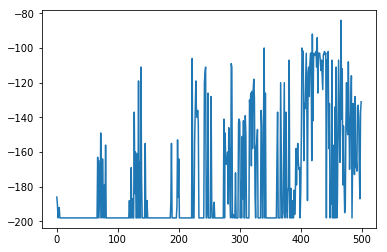

In [3]:
run()

In [4]:
import numpy as np
import copy
a = [0,1,2,3,4,5,6,7,8,9,10]
c = [0,1,2,3,4,5,6,7,8,9,10]
a = np.array(a)
perm = np.random.permutation(len(a))
print(perm)
gg = copy.deepcopy(perm)
print(gg)
for start in perm[::3]:
    print(start)
    b = a[perm[start : start + 3]]
    print(b)
    for index in range(len(b)):
        print("b:" + str(b[index]))
        print("c:" + str(c[perm[start + index]]))
        

[10  2  4  1  5  8  9  7  0  6  3]
[10  2  4  1  5  8  9  7  0  6  3]
10
[3]
b:3
c:3
1
[2 4 1]
b:2
c:2
b:4
c:4
b:1
c:1
9
[6 3]
b:6
c:6
b:3
c:3
6
[9 7 0]
b:9
c:9
b:7
c:7
b:0
c:0
